<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Experiment_Linear_model_for_diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [24]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# Feature names

In [25]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Creating X and y matrices

In [26]:
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

# Split dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Check training and test set dimensions

In [28]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [29]:
X_test.shape, y_test.shape

((89, 10), (89,))

# Building linear regression model

In [30]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Applying trained model to predict on test set

In [31]:
 y_pred = regressor.predict(X_test)

# Model performance

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)} ")
print(f"Coeffiecent of determination (R²): {r2_score(y_test, y_pred):.2f}")

Coefficients: [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Intercept: 151.3456553477407
Mean Squared Error (MSE): 2900.1732878832318 
Coeffiecent of determination (R²): 0.45


# Check coefficients along side with the features

In [33]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [34]:
print(regressor.coef_)

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


# Making scatter plot

In [35]:
X_test

array([[ 0.04534098, -0.04464164, -0.00620595, -0.01599922,  0.1250187 ,
         0.1251981 ,  0.019187  ,  0.03430886,  0.03243323, -0.0052198 ],
       [ 0.09256398, -0.04464164,  0.03690653,  0.02187235, -0.02496016,
        -0.01665815,  0.00077881, -0.03949338, -0.02251217, -0.02178823],
       [ 0.06350368,  0.05068012, -0.00405033, -0.01255635,  0.10300346,
         0.04878988,  0.05600338, -0.00259226,  0.08449528, -0.01764613],
       [ 0.09619652, -0.04464164,  0.0519959 ,  0.07925353,  0.05484511,
         0.03657709, -0.07653559,  0.14132211,  0.09864637,  0.06105391],
       [ 0.01264814,  0.05068012, -0.02021751, -0.00222774,  0.03833367,
         0.05317395, -0.00658447,  0.03430886, -0.00514531, -0.00936191],
       [ 0.0090156 , -0.04464164, -0.02452876, -0.02632783,  0.0988756 ,
         0.0941964 ,  0.07072993, -0.00259226, -0.02139368,  0.00720652],
       [-0.00914709,  0.05068012,  0.17055523,  0.01498661,  0.03007796,
         0.03375875, -0.02131102,  0.03430886

In [36]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

# Making a scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


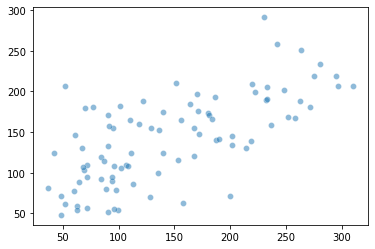

In [37]:
import seaborn as sns

sns.scatterplot(y_test, y_pred, alpha=0.5)

# Conducting K-Fold Cross validation

In [41]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(regressor,X,y,cv=10)
print(scores.mean()*100)

46.1962361958337
